### Step 1 : Load the dataset

In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/User/Downloads/netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Step 2 : Structure and column overview

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Step 3 : Summary statistics (all columns)

In [3]:
df.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


### Step 4 : Missing value report

In [4]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Step 5 : Remove duplicates 

In [5]:
df.drop_duplicates(inplace=True)
print("Duplicates dropped successfully.")


Duplicates dropped successfully.


### Step 6 : Handle data - added columns

In [10]:
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df[['date_added', 'year_added', 'month_added']].head()



,date_added,year_added,month_added
0,2021-09-25,2021.0,9.0
1,2021-09-24,2021.0,9.0
2,2021-09-24,2021.0,9.0
3,2021-09-24,2021.0,9.0
4,2021-09-24,2021.0,9.0


In [11]:
df['date_added'].isna().sum()

10

### Step : 7 Count of content types

In [14]:
df['type'].value_counts()



type
Movie      6131
TV Show    2676
Name: count, dtype: int64

<Axes: title={'center': 'Content Type Distribution'}, xlabel='type'>

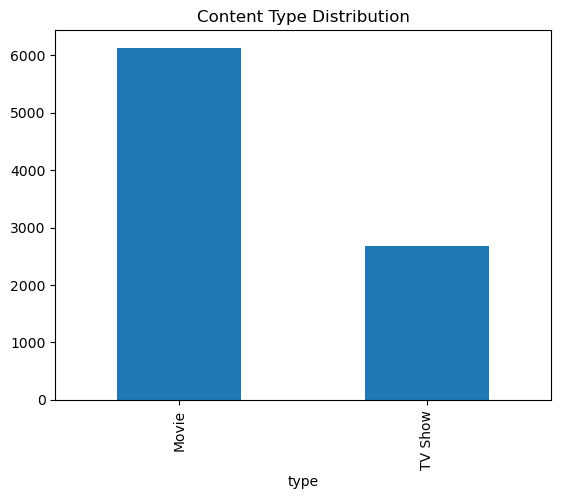

In [15]:
df['type'].value_counts().plot(kind='bar', title='Content Type Distribution')

### Step : 8 Content added per year

Titles Added Per Year:
year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2018.0    1649
2019.0    2016
2020.0    1879
2021.0    1498
Name: count, dtype: int64


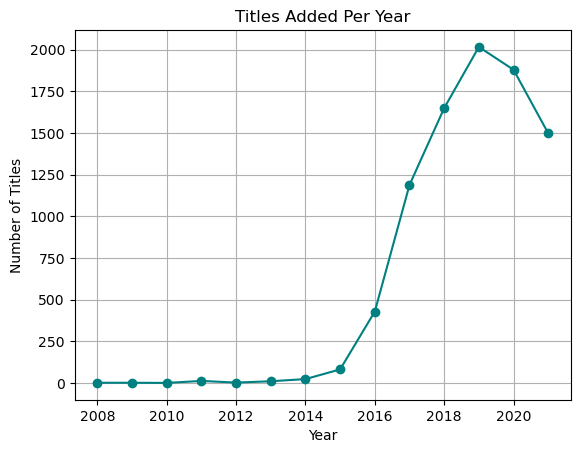

In [17]:
import matplotlib.pyplot as plt

print("Titles Added Per Year:")
print(df['year_added'].value_counts().sort_index())

df['year_added'].value_counts().sort_index().plot(
    kind='line', marker='o', title='Titles Added Per Year', color='teal'
)
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


### Step : 9 Top countries by content

Top 10 Countries by Number of Titles:
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


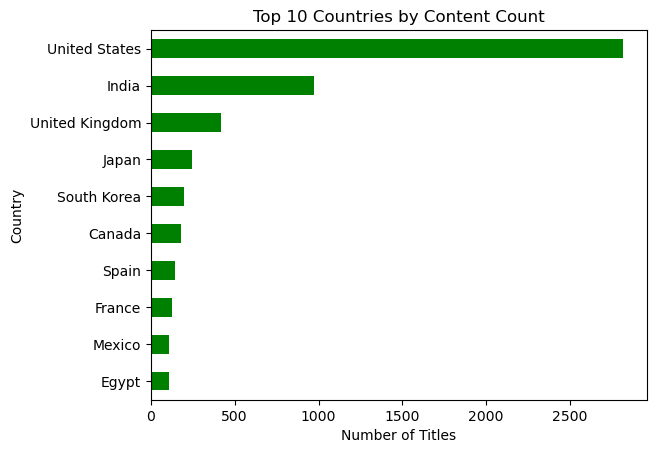

In [18]:
top_countries = df['country'].value_counts().head(10)
print("Top 10 Countries by Number of Titles:")
print(top_countries)
top_countries.plot(kind='barh', title='Top 10 Countries by Content Count', color='green')
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.show()


### Step 10 : Rating distributions

Ratings Distribution:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


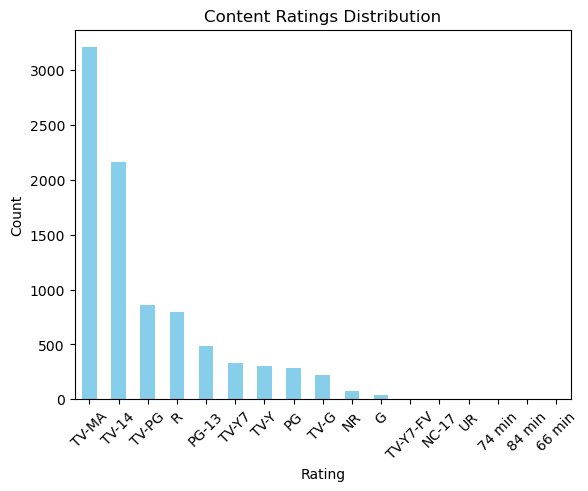

In [19]:
print("Ratings Distribution:")
print(df['rating'].value_counts())
df['rating'].value_counts().plot(kind='bar', title='Content Ratings Distribution', color='skyblue')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### Step 11 : Correlation heatmap for numeric columns

Correlation Matrix:
            year_added
year_added         1.0


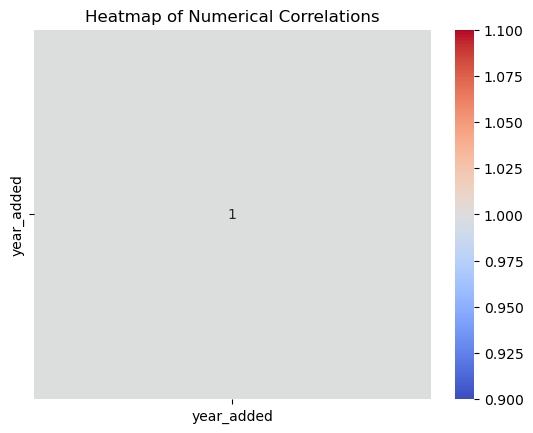

In [20]:
import seaborn as sns

print("Correlation Matrix:")
numeric_df = df[['year_added']].dropna()
print(numeric_df.corr())
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Numerical Correlations')
plt.show()


### Content trend and time series (optional)

Monthly trend of content addition

<Axes: title={'center': 'Monthly Content Additions'}, xlabel='month_year'>

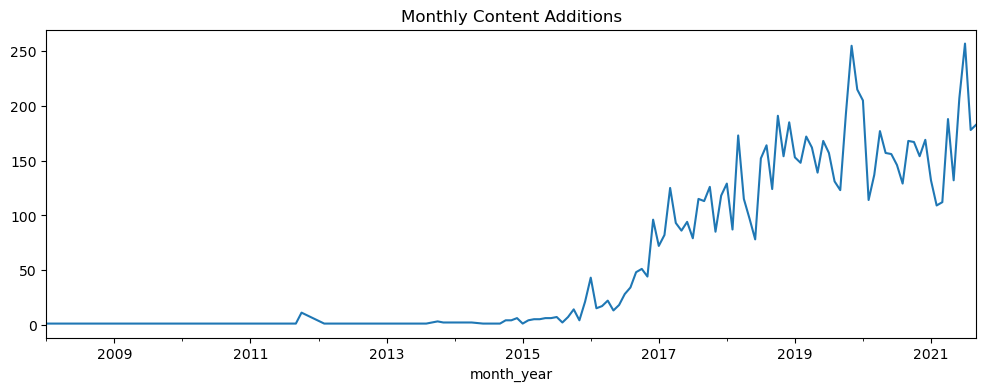

In [21]:
df['month_year'] = df['date_added'].dt.to_period('M')
df['month_year'].value_counts().sort_index().plot(kind='line', figsize=(12,4), title='Monthly Content Additions')


Cumulative Growth of Netflix Library Over Time

<Axes: title={'center': 'Cumulative Titles Added'}, xlabel='date_added'>

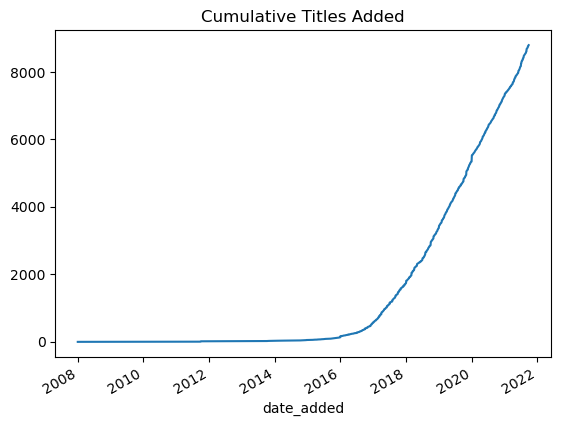

In [22]:
df['date_added'].sort_values().value_counts().sort_index().cumsum().plot(title='Cumulative Titles Added')


### Genre and Category Exploration

Top 10 Genres (Split by Type)

<Axes: title={'center': 'Top 10 Genres'}, ylabel='listed_in'>

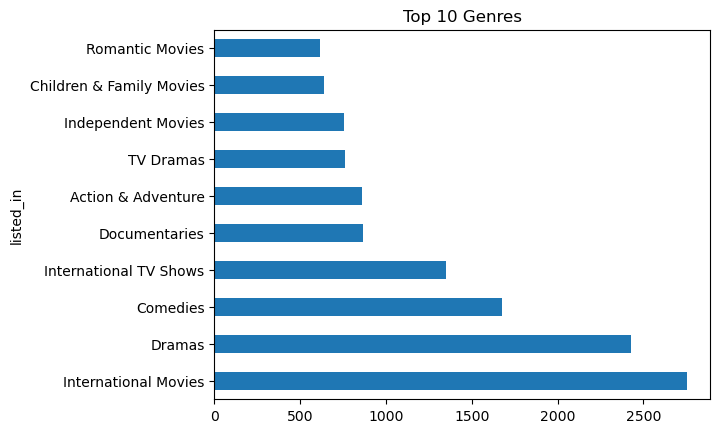

In [23]:
df['listed_in'].str.split(', ').explode().value_counts().head(10).plot(kind='barh', title='Top 10 Genres')

Heatmap of genre vs rating

<Axes: xlabel='listed_in', ylabel='rating'>

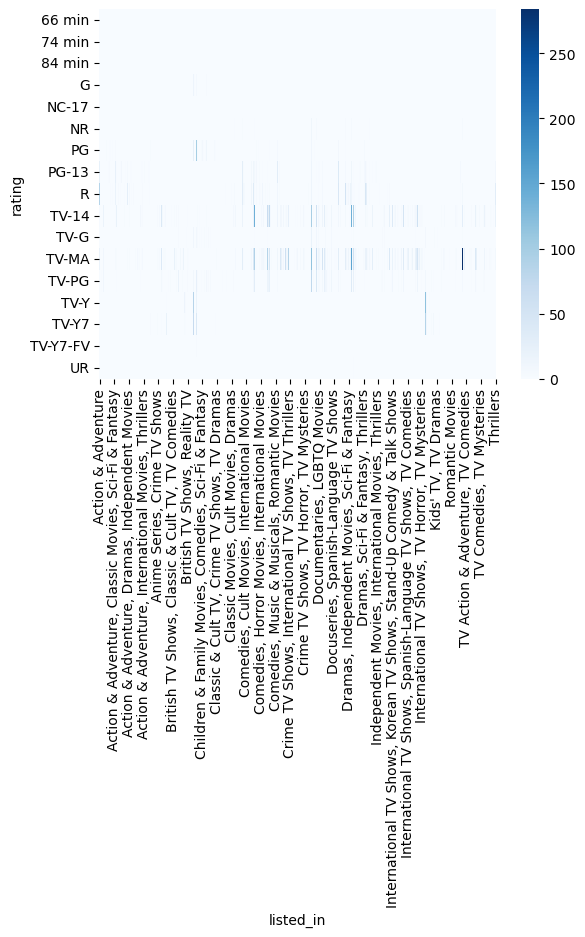

In [24]:
genre_rating = df.explode('listed_in').groupby(['rating', 'listed_in']).size().unstack(fill_value=0)
sns.heatmap(genre_rating, cmap='Blues')